<center>
    <u><font size="36">Multi-Class Logistic Regression</font></u>
    <h2>by Rebecca Hinrichs</h2>
    <h4>SPRING 2023</h4>
</center>

---
<center><h1> *** Summary *** </h1></center>
We will load the Abalone data set available at <a href="https://archive.ics.uci.edu/ml/index.php">the UCI ML Repository</a> and use <code>sklearn</code>'s k-Nearest Neighbors Regressor in order to predict the number of rings in an Abalone shell given its measurable features as recorded in the dataset. We will train our machine learning model and grade our best fit hyperparameters by minimizing the residuals. Finally we will report our findings of the optimal values and report our model performance. <br>    

---

> Import data

In [76]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Import ML Libraries
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split

# Import Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(url)

# Set Global Variables
df.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", 
              "Viscera weight", "Shell weight", "Rings"]
display(df)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


---

<center><h2> *** Exploratory Data Analysis *** </h2></center>

---

> 2. Feature Analysis

In [2]:
# Evaluate the Features of the Dataset
num_rows, num_cols = df.shape[0], df.shape[1]
colnames, target_index = [x for x in df.columns], int(-1)
print('\n<<<----------------- REVIEWING DATABASE RECORDS ----------------->>>\n')
# Observe the structure of the data
print(f'Database :: {num_rows} samples x {num_cols} features')
print(f'\nThe data types of each column are \n{df.dtypes}\n')
class_type = 'string' if (df[colnames[target_index]].dtype == object) else 'numeric'
print(f'The target variable `{colnames[target_index]}` is {class_type}\n')

# Check for empty values in the data
vals = ['null','zero']
for x in vals:
    col_sum = df.isna().sum() if (x == 'null') else (df==0).sum()
    print(f'<< ---------- Detecting {x.capitalize()} Values ---------- >> ')
    print(f'\n{col_sum.sum()} entries == ', \
          f'{round(col_sum.sum()/(num_rows*num_cols)*100,4)}% of the data\n')


<<<----------------- REVIEWING DATABASE RECORDS ----------------->>>

Database :: 4176 samples x 9 features

The data types of each column are 
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

The target variable `Rings` is numeric

<< ---------- Detecting Null Values ---------- >> 

0 entries ==  0.0% of the data

<< ---------- Detecting Zero Values ---------- >> 

2 entries ==  0.0053% of the data



> 3. Class Analysis


<<<----------------- ANALYZING CLASS DISTRIBUTION ----------------->>>

The number of records per class assignment is as follows:
<Label>	<Count>	<Percent>
    1	    1	  0.0%
    2	    1	  0.0%
    3	   15	  0.4%
    4	   57	  1.4%
    5	  115	  2.8%
    6	  259	  6.2%
    7	  391	  9.4%
    8	  568	  13.6%
    9	  689	  16.5%
   10	  634	  15.2%
   11	  487	  11.7%
   12	  267	  6.4%
   13	  203	  4.9%
   14	  126	  3.0%
   15	  102	  2.4%
   16	   67	  1.6%
   17	   58	  1.4%
   18	   42	  1.0%
   19	   32	  0.8%
   20	   26	  0.6%
   21	   14	  0.3%
   22	    6	  0.1%
   23	    9	  0.2%
   24	    2	  0.0%
   25	    1	  0.0%
   26	    1	  0.0%
   27	    2	  0.0%
   29	    1	  0.0%




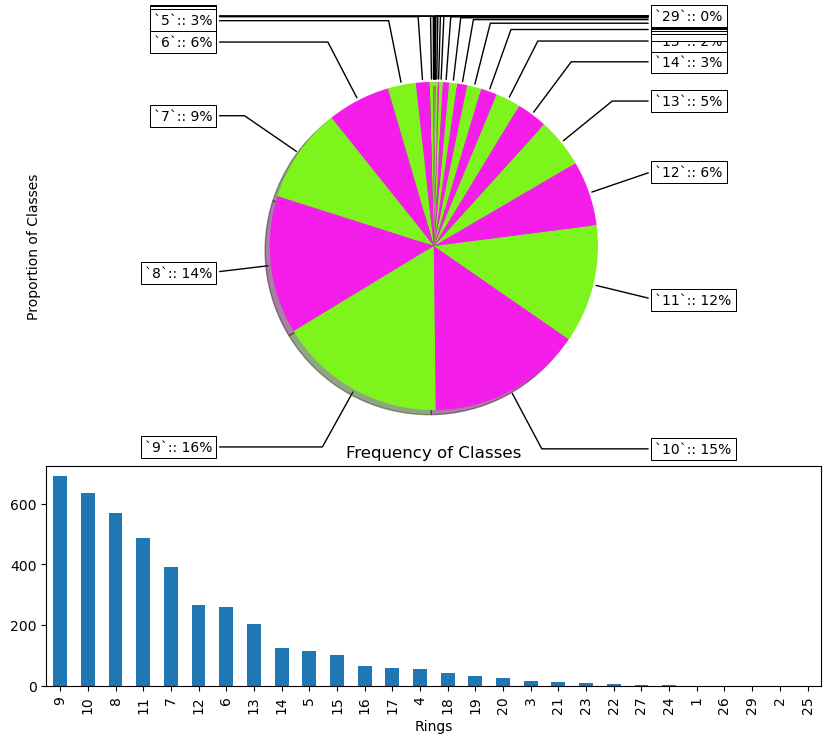

In [3]:
# Evaluate the Target Variable
print('\n<<<----------------- ANALYZING CLASS DISTRIBUTION ----------------->>>\n')
classes = df.groupby(colnames[target_index]).size()
labels, sizes = classes.index.values, classes.values
print('The number of records per class assignment is as follows:')
print(f'<Label>\t<Count>\t<Percent>')
for l,s in zip(labels, sizes):
    print(f'{l:>5}\t{s:>5}\t  {s/sizes.sum():.1%}')
print()

# Display label distribution as proportions of the dataset
fig = plt.figure(figsize=(10,8))  # graph window
gs = gridspec.GridSpec(5, 1)  # 6 rows x 1 col
label_list = []  # to store class distribution info in notation boxes
for k in range(labels.size):
  text = '`'+str(labels[k])+'`:: '+'{:,.0f}%'.format((100*sizes[k]/sum(sizes)))
  label_list.append(text)
colors = ['#7df51d','#f51de9']  # pie wedge colors
bbox_props = dict(boxstyle='square,pad=0.3', fc='w', ec='k', lw=0.72)  # notation boxes layout
kw = dict(arrowprops=dict(arrowstyle='-'), bbox=bbox_props, zorder=0, va='center')  # pointers
ax1 = plt.subplot(gs[:3, 0])  # to spread pie plot across 2 rows
ax1.set_ylabel('Proportion of Classes') # label to graph 'ax1'
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # equal aspect ratio ensures that pi is drawn as a circle
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1:'right', 1:'left'}[int(np.sign(x))]
    connectionstyle = 'angle, angleA=0, angleB={}'.format(ang)
    kw['arrowprops'].update({'connectionstyle': connectionstyle})
    ax1.annotate(label_list[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)
fig.add_subplot(ax1) # add 'ax1' to figure
print()
# Display label distribution as frequency bins of the dataset
ax2 = plt.subplot(gs[3:, 0])
df[colnames[target_index]].value_counts().plot(kind='bar', title='Frequency of Classes')
fig.add_subplot(ax2) # add 'ax2' to figure
plt.subplots_adjust(hspace=0.5)
plt.show()
print()

---

<center><h2> *** Data Preparation *** </h2></center>

---

> 1. Split the data between class labels and features

In [4]:
# Split the data into Feature/Target Variable Sets
target_index = df.columns.get_loc('Rings')  # identify categorical class label
cat_index = df.columns.get_loc('Sex')       # identify categorical feature
y = df['Rings'].to_numpy()    # extract target variable → NumPy vector
X_cat = df['Sex']             # extract categorical feature
X = df.drop(['Sex','Rings'], axis=1).to_numpy()  # numeric features → NumPy array
print(f'\nDataframe :: {df.shape} →' \
      f'\n\tFeatures `X` :: {X.shape} + {X_cat.shape}\n\tLabels  `y`  :: {y.shape}')
print(f'\nCategorical feature `Sex`::\n{X_cat.sample(5)}')


Dataframe :: (4176, 9) →
	Features `X` :: (4176, 7) + (4176,)
	Labels  `y`  :: (4176,)

Categorical feature `Sex`::
3097    F
3932    I
242     I
2273    M
337     M
Name: Sex, dtype: object


> 2. Factorize categorical inputs

In [5]:
# Factorize Nominal Categorical Features
print('\nBefore factorization::\n', set(X_cat),'\tShape::', X_cat.shape)
X_cat = pd.get_dummies(X_cat, prefix='Sex')   # factorize into binary cols
print('\nAfter factorization::\n', set(X_cat.columns), \
      '\tShape::', X_cat.shape,'\n')
X_cat = X_cat.astype(int).to_numpy()       # convert bools → ints & pandas → NumPy
print(f'Vectorized categorical feature `Sex`::\n'\
      f'{X_cat[np.random.randint(X_cat.shape[0], size=5), :]}')


Before factorization::
 {'M', 'F', 'I'} 	Shape:: (4176,)

After factorization::
 {'Sex_I', 'Sex_F', 'Sex_M'} 	Shape:: (4176, 3) 

Vectorized categorical feature `Sex`::
[[1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]]


> 3. Normalize input variables

In [6]:
# Check for need to scale regressor features
print(f'\nEvaluating scaling eligibility for regression features::')
print(f'\tMax value :: {X.max()}\tMin value :: {X.min()}')  # confirm necessity
print(f'\tData types of regression features in `X` :: {X.dtype}')  # confirm eligibility
print(f'\t\t of categorical feature in `X` :: {X_cat.dtype} ' \
      f':: will not be scaled\n') # no scaling

# Scale the numeric features
scaler = StandardScaler().fit(X)  # save mean,std scalar vector for test data
X = scaler.transform(X)
print('Mean & standard deviation (scalar) per feature::\n', np.round(scaler.scale_, 4))

# Display scaled results
print(f'\nSample of scaled numeric features::\n'\
      f'{np.round(X[np.random.randint(X.shape[0], size=5), :], 4)}\n')


Evaluating scaling eligibility for regression features::
	Max value :: 2.8255	Min value :: 0.0
	Data types of regression features in `X` :: float64
		 of categorical feature in `X` :: int32 :: will not be scaled

Mean & standard deviation (scalar) per feature::
 [0.1201 0.0992 0.0418 0.4904 0.222  0.1096 0.1392]

Sample of scaled numeric features::
[[ 1.0492  0.777   0.0113  0.706   0.5208  0.5738 -0.1714]
 [ 0.6744  0.8274  0.6091  0.4939  0.5524  0.1176  0.8129]
 [-0.2416 -0.0795  0.37   -0.3759 -0.5289 -0.439  -0.2432]
 [ 2.0484  1.9358  1.8046  2.785   3.1182  2.7497  2.4796]
 [-0.6579 -0.6841 -0.4669 -0.7776 -0.7497 -0.7035 -0.782 ]]



> 4. Factorize categorical outputs

In [7]:
# Convert integer classifiers to NumPy categorical labels
print(f'\nData types of regression features in `y` :: {y.dtype}')  # confirm eligibility
print('\nBefore factorization::\n', np.unique(y),'\tType::', y.dtype)
y -= np.min(y)
y = np_utils.to_categorical(y, num_classes=int(np.max(y)+1))
print('\nAfter factorization::\n', np.unique(y),'\tType::', y.dtype)

# Display scaled results
print(f'\nSample of scaled numeric features::\n'\
      f'{np.round(y[np.random.randint(y.shape[0], size=5), :], 4)}\n')


Data types of regression features in `y` :: int64

Before factorization::
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 29] 	Type:: int64

After factorization::
 [0. 1.] 	Type:: float32

Sample of scaled numeric features::
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]



> 5. Discretize the data & store

In [26]:
# Concatenate the regressors and categorical inputs
X = np.concatenate((X, X_cat), axis=1)
print(f'\nSample of all features of one data observation::\n'\
      f'{np.round(X[np.random.randint(X.shape[0], size=1), :], 2)}')

# Split the data into Training/Testing Sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, 
                                                              test_size=0.2,
                                                              random_state=42)

# Split the Training Data into Modeling/Cross-Validation Sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, 
                                                      test_size=0.25, # 25% validation
                                                      random_state=42)

# Describe the discretized data
print('\n<<<------------- PRESENTING SUBSET DATA ------------->>>\n')
print(f'\t`X_train` :: {X_train.shape} & labels   `y_train` :: {y_train.shape}')
print(f'\t`X_valid` ::  {X_valid.shape} & labels   `y_valid` ::  {y_valid.shape}')
print(f'\t `X_test` ::  {X_test.shape} & labels   `y_test`  ::  {y_test.shape}')
print(f'  All `X` subsets :: ({X_train.shape[0]+X_valid.shape[0]+X_test.shape[0]}, ' \
      f'{int((X_train.shape[1]+X_valid.shape[1]+X_test.shape[1])/3)}) & labels  ' \
      f'`y` subsets :: ({y_train.shape[0]+y_valid.shape[0]+y_test.shape[0]}, ' \
      f'{int((y_train.shape[1]+y_valid.shape[1]+y_test.shape[1])/3)})' \
      f'\n\t == dataframe :: ({df.shape[0]}, {int(df.shape[1])+2+28}) ' \
      f'including 30 added binary columns')
print('\n<<<============ DATA PRE-PROCESSING IS COMPLETE! ============>>>\n')

# Save the tensor data to h5 files for later use
import h5py
hf = h5py.File('generated_files/HW5_Hinrichs_data.h5', 'w')
hf.create_dataset('X_train', data=X_train)
hf.create_dataset('X_valid', data=X_valid)
hf.create_dataset('X_test', data=X_test)
hf.create_dataset('y_train', data=y_train)
hf.create_dataset('y_valid', data=y_valid)
hf.create_dataset('y_test', data=y_test)
hf.close()


Sample of all features of one data observation::
[[-3.24 -2.8  -2.38 -1.63 -1.56 -1.59 -1.66  0.    1.    0.  ]]

<<<------------- PRESENTING SUBSET DATA ------------->>>

	`X_train` :: (2505, 10) & labels   `y_train` :: (2505, 29)
	`X_valid` ::  (835, 10) & labels   `y_valid` ::  (835, 29)
	 `X_test` ::  (836, 10) & labels   `y_test`  ::  (836, 29)
  All `X` subsets :: (4176, 10) & labels  `y` subsets :: (4176, 29)
	 == dataframe :: (4176, 39) including 30 added binary columns

<<<============ DATA PRE-PROCESSING IS COMPLETE! ============>>>



---

<center><h2> *** kNN Prediction Modeling *** </h2></center>

---

In [1]:
 # Import pre-processed tensor data from 'h5' file
import h5py
import numpy as np
hf = h5py.File('generated_files/HW5_Hinrichs_data.h5', 'r')
x_train = np.array(hf['X_train'])
x_valid = np.array(hf['X_valid'])
x_test = np.array(hf['X_test'])
y_train = np.array(hf['y_train'])
y_valid = np.array(hf['y_valid'])
y_test = np.array(hf['y_test'])
hf.close()

# Import Dependencies
import matplotlib.pyplot as plt
import seaborn as sns

# Import ML Libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

# Describe the data shapes (2D Tensors)
print('\nTraining Shape ::', x_train.shape)
print('Training Labels ::', y_train.shape)
print('\nValidation Shape ::', x_valid.shape)
print('Validation Labels ::', y_valid.shape)
print('\nTesting Shape ::', x_test.shape)
print('Testing Labels ::', y_test.shape, '\n')


Training Shape :: (2505, 10)
Training Labels :: (2505, 29)

Validation Shape :: (835, 10)
Validation Labels :: (835, 29)

Testing Shape :: (836, 10)
Testing Labels :: (836, 29) 



> From scratch

In [2]:
## Collection of <modified> Functions to perform kNN modelling (by Dr.Jegdic)

# Function to calculate the Euclidean distance (L2) between two data points
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))  # square root of the dot product

# Function to create a list of 'k' nearest neighbors between training data & a SINGLE TEST POINT
# For each such neighbor, this list will store: features of that neighbor, its label, its distance to the test point
def k_nearest_neighbors(point, training_features, training_labels, k):
    neighbors, weights = [], []
    for p, l in zip(training_features, training_labels):
        d = distance(point, p)
        l = np.argmax(l)
        info = [p, l, d]
        neighbors.append(info)
    neighbors.sort(key = lambda x : x[-1])
    distances = sum(x[-1] for x in neighbors)
    for w in range(k):
        weights.append(x[-1] for x in neighbors)
    return neighbors[:k]  # nearest neighbors to the test point

# Function to make either classification or regression prediction of a SINGLE TEST POINT
# Because no training is involved in kNN, this is the only step required to decide a target value
def knn_predict(point, training_features, training_labels, k, regression = False):
    neighbors = k_nearest_neighbors(point, training_features, training_labels, k)
    labels = [y[1] for y in neighbors]
    if regression == False:
        return max(labels, key = labels.count)  # majority representative of neighbors
    else:
        return int(np.round(sum(y for y in labels)/k,0))  # average value of neighbors

# Function to describe the accuracy score of the predicted target values of ALL TEST POINTS
def accuracy(test_features, test_labels, training_features, training_labels, k, regression = False):
    correct = 0
    for point, label in zip(test_features, test_labels):
        label_value = int(np.argmax(label))
        correct += label_value == knn_predict(point, training_features, training_labels, k, regression=regression)
    return correct/len(test_features)

In [45]:
## Functions to Calculate Error from model predictions
def report_error(true_label, pred_label, weights = None):
    print(f'\nThe Mean Absolute Error (MAE) is {mae(true_label, pred_label, weights=weights)}\n' \
          f'The Mean Squared Error (MSE) is {mse(true_label, pred_label, weights=weights)}\n' \
          f'The Root Mean Squared Error (RMSE) is {rmse(true_label, pred_label, weights=weights)}\n')

# Mean Absolute Error (regression loss)
def mae(true_label, pred_label, weights = None):
    errors = np.average(np.abs(true_label - pred_label), 
                        weights=weights)  # if 'none' == uniform average
    return np.average(errors, weights)
    
# Mean Squared Error (regression loss)
def mse(true_label, pred_label, weights = None):
    errors = np.average((true_label - pred_label)**2, 
                        weights=weights)  # if 'none' == uniform average
    return np.average(errors, weights)
    
# Root Mean Squared Error (regression loss)
def rmse(true_label, pred_label, weights = None):
    errors = np.average((true_label - pred_label)**2, 
                        weights=weights)  # if 'none' == uniform average
    return np.sqrt(np.average(errors, weights))
    
# Scikit-Learn's Benchmark Function for comparison
from sklearn.metrics import mean_squared_error

> Test the functions

In [4]:
# Print a random sample of 7 nearest neighbors to 1 test data point
pick_me = np.random.randint(x_test.shape[0], size=1)[0]  # generates a random index
k_nearest_neighbors(x_test[pick_me], x_train, y_train, 7)

[[array([-1.11591862, -1.08720356, -0.94513996, -1.146733  , -1.12140693,
         -1.10953044, -1.11247639,  0.        ,  1.        ,  0.        ]),
  6,
  0.12248277161973146],
 [array([-1.03264647, -1.18797177, -0.94513996, -1.16406704, -1.1506924 ,
         -1.10953044, -1.1304367 ,  0.        ,  1.        ,  0.        ]),
  6,
  0.13155218462469934],
 [array([-1.11591862, -1.18797177, -0.94513996, -1.11002564, -1.0538251 ,
         -1.06847479, -1.13402876,  0.        ,  1.        ,  0.        ]),
  6,
  0.14062473954509228],
 [array([-1.1575547 , -1.08720356, -0.94513996, -1.09982915, -1.07184692,
         -1.07303653, -1.06937167,  0.        ,  1.        ,  0.        ]),
  6,
  0.15797084477874745],
 [array([-1.28246293, -1.18797177, -0.94513996, -1.18038142, -1.15745058,
         -1.18708   , -1.10529227,  0.        ,  1.        ,  0.        ]),
  9,
  0.1587181390147692],
 [array([-1.11591862, -1.23835587, -0.94513996, -1.11716318, -1.04481419,
         -1.08216001, -1.1627652

In [5]:
# Predict the class label for that test point
knn_predict(x_test[pick_me], x_train, y_train, 7, regression = True)

7

In [6]:
# Print the actual class label for that test point
np.argmax(y_test[pick_me])

5

In [7]:
# Describe the accuracy of our prediction
accuracy(x_valid, y_valid, x_train, y_train, 7, regression = True)

0.26107784431137726


Optimal `k` value(s) :: 19 neighbor(s) with 27.90% accuracy



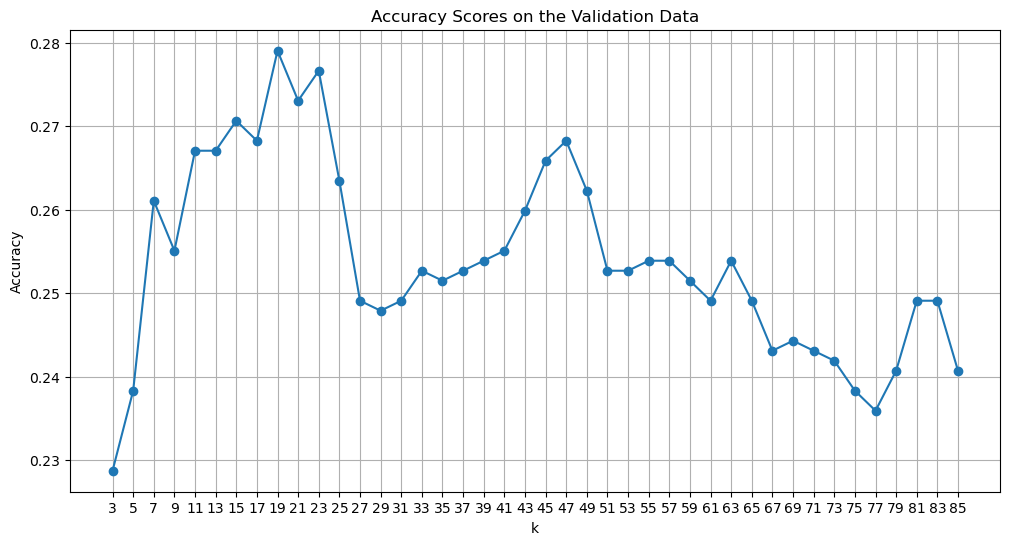

In [8]:
# Function to search optimal 'k' value by finding the best accuracy score
# k_range is a 3-valued tuple configured as range(start, stop, step)
def optimal_k(test_features, test_labels, training_features, training_labels, k_range, regression = False):
    k_values = [k for k in range(k_range[0], k_range[1], k_range[2])]
    accuracy_values = [accuracy(test_features, test_labels, training_features, training_labels, k, regression=regression) for k in k_values]
    max_accuracy_index = np.argmax(accuracy_values)
    best_k, best_acc = k_values[max_accuracy_index], accuracy_values[max_accuracy_index]
    print(f'\nOptimal `k` value(s) :: {best_k} neighbor(s) with {best_acc*100:.2f}% accuracy\n')
    return k_values, accuracy_values, best_k, best_acc

# Run the modeling training & cross-validation functions to find the optimal `k` value
k_values, accuracy_values, best_k, accuracy_score = optimal_k(test_features = x_valid, 
                                                              test_labels = y_valid, 
                                                              training_features = x_train, 
                                                              training_labels = y_train, 
                                                              k_range = (3, y_train.shape[1]*3, 2), # keep k odd
                                                              regression = True)

# Demonstrate the accuracy scores given by the Cross-Validation Testing
plt.figure(figsize = (12, 6))
plt.plot(k_values, accuracy_values, marker = "o")
plt.title('Accuracy Scores on the Validation Data')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid();

In [9]:
# Observe the True Accuracy by predicting against the Test Data
accuracy(x_test, y_test, x_train, y_train, best_k)

0.23923444976076555

> Using `sklearn`

In [4]:
# Fit the kNN Model using a varying selection of 'k' neighbors to find best
k_values, y_preds, y_trues, errors = [], [], [], []
for k in range(1, int(y_train.shape[1])*3, 2):  # k must be odd
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(x_train, y_train)
    y_pred = [np.argmax(p) for p in model.predict(x_valid)]
    y_true = [np.argmax(t) for t in y_valid]
    error = mean_squared_error(y_true, y_pred)
    y_trues.append(y_true)
    y_preds.append(y_pred)
    errors.append(error)
    k_values.append(k)
min_error_index = errors.index(min(errors))
best_k2 = k_values[min_error_index]
print(f'\nOptimal `k` is {best_k2} with the lowest MSE of {errors[min_error_index]}\n')


Optimal `k` is 17 with the lowest MSE of 6.280239520958084



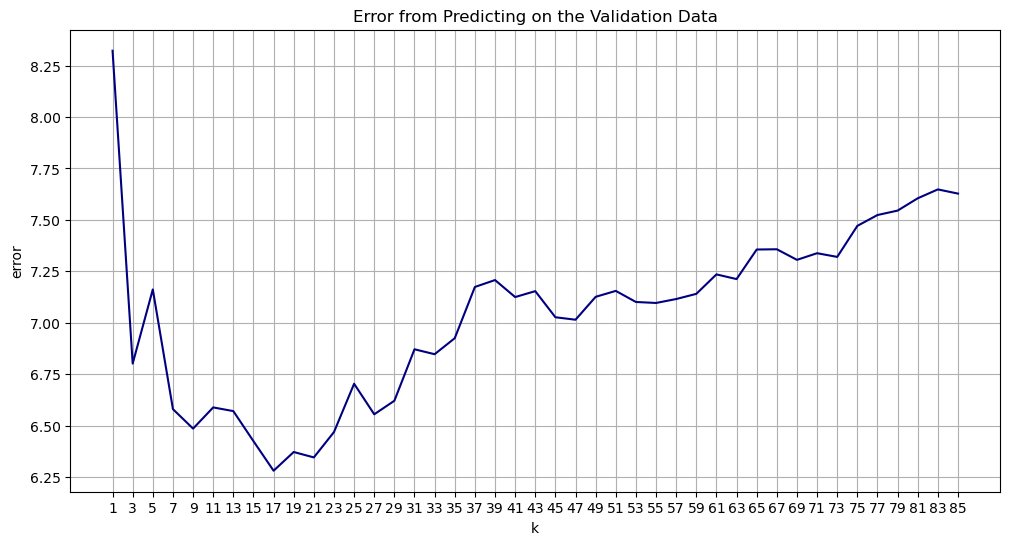

In [12]:
# Demonstrate the regression errors given by the Cross-Validation Testing
plt.figure(figsize = (12, 6))
plt.plot(k_values, errors, color = "navy", label = "prediction")
plt.title("Error from Predicting on the Validation Data")
plt.xlabel("k")
plt.ylabel("error")
plt.xticks(k_values)
plt.grid()

In [13]:
# Observe the True Accuracy by predicting against the Test Data
accuracy(x_test, y_test, x_train, y_train, best_k2)

0.2631578947368421

Since this gives us a better accuracy score on the test data than our 'from scratch' model, we'll stick with k=17 for our optimal `k`.<br>
From here, we can try to optimize our hyperparameters further using GridSearchCV.

--- 
<center>
<h2>*** Hyperparameter Optimization using GridSearchCV ***</h2>
</center> 

--- 

In [7]:
# Fit a new instantiation with the optimal 'k'
model = KNeighborsRegressor(n_neighbors = best_k2)
model.fit(x_train, y_train)
y_pred = [np.argmax(p) for p in model.predict(x_valid)]
y_true = [np.argmax(t) for t in y_valid]
# for i in range(len(y_pred)):
#     report_error(y_true[i], y_pred[i])

[-0.03 -0.03 -0.03 -0.03 -0.03]
Average loss: -0.029458131268620492
Loss standard deviation: 0.00037470512391739986


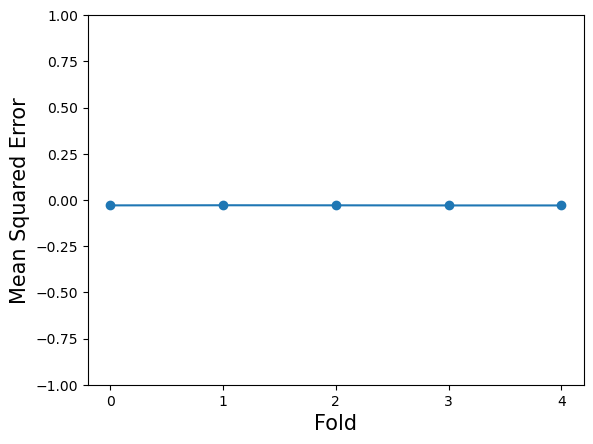

In [53]:
# ---> ValueError: Classification metrics can't handle a mix of multiclass and continuous targets
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
cv_scores = cross_val_score(KNeighborsRegressor(n_neighbors=best_k2), 
                            x_train, 
                            y_train, 
                            cv=KFold(n_splits=5, shuffle=True), 
                            scoring=make_scorer(mean_squared_error, 
                                                greater_is_better=False))
# Demonstrate cross-validation accuracy scores
plt.plot(range(0, 5), cv_scores, marker='o')
plt.ylim(-1, 1)
plt.ylabel('Mean Squared Error', fontsize=15)
plt.xlabel('Fold', fontsize=15)
plt.xticks(range(0, 5))
print(np.round(cv_scores,2))
print('Average loss:', cv_scores.mean())
print('Loss standard deviation:', cv_scores.std());  

In [73]:
# Search for best parameters by tuning scoring metric via GridSearchCV
from sklearn.metrics import confusion_matrix, r2_score, roc_auc_score
scoring = {"AUC": make_scorer(roc_auc_score, multi_class='ovr', average='micro'),
           # "Accuracy": make_scorer(accuracy_score), # accuracy preferred
           # "Conf_Matrix": make_scorer(confusion_matrix, greater_is_better=False),
           "R2": make_scorer(r2_score, greater_is_better=False),
           "MSE": make_scorer(mean_squared_error, greater_is_better=False)
          }
# Model the Grid with the tuning metrics
gs = GridSearchCV(estimator = KNeighborsRegressor(),
                  param_grid = {"n_neighbors": range(1, int(y_train.shape[1])*3, 2),
                                "weights": ['uniform', 'distance'],
                                "p": [1,2],
                                "metric": ['cityblock','cosine','euclidean','l1',
                                           'l2','manhattan']},
                  refit = "AUC",
                  scoring = scoring,
                  cv=KFold(n_splits=5, shuffle=True))
gs.fit(x_train, y_train)
results = gs.cv_results_ # dict containing scores of all scores available
print(f'\nBest Scorer: {gs.scorer_}' \
      f'\nNumber of Folds: {gs.n_splits_}' \
      f'\nMultimetric?: {gs.multimetric_}' \
      f'\n- - - - - - - - - - - - - - - - - - ' \
      f'\nBest Estimator: {gs.best_estimator_}' \
      f'\nBest Index: {gs.best_index_}' \
      f'\nBest Score: {gs.best_score_}' \
      f'\nBest Parameters: {gs.best_params_}\n')


Best Scorer: {'AUC': make_scorer(roc_auc_score, multi_class=ovr, average=micro), 'R2': make_scorer(r2_score, greater_is_better=False), 'MSE': make_scorer(mean_squared_error, greater_is_better=False)}
Number of Folds: 5
Multimetric?: True
- - - - - - - - - - - - - - - - - - 
Best Estimator: KNeighborsRegressor(metric='cosine', n_neighbors=85, p=1, weights='distance')
Best Index: 341
Best Score: 0.9077636856313036
Best Parameters: {'metric': 'cosine', 'n_neighbors': 85, 'p': 1, 'weights': 'distance'}



In [75]:
# Baseline regression model to compare against our tuned model
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='mean')
dummy.fit(x_train, y_train).predict(x_valid) # input is ignored
dummy.score(x_valid, y_valid)

0.06750994615745327

Given that we can estimate our error to give an <i>approximate</i> accuracy score of $1-0.9 = 0.10$ and our baseline zero-prediction-data model gives us $0.06$ <<not far!>>, we want to try another approach to hope for better output....

--- 
<center>
<h2>*** Hyperparameter Optimization using RandomizedSearchCV ***</h2>
</center> 

--- 

In [1]:
## Import all the Goods in the Fresh
import numpy as np
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(url)
df.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", 
              "Viscera weight", "Shell weight", "Rings"]

In [2]:
## Let's Pipeline everything from the top and use optimization along the way
from sklearn.pipeline import Pipeline
X, y = df.iloc[:,:-1], df.iloc[:,-1]  # features vs target variable

# Make a transformation pipeline to factorize & scale the data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
numeric_features = [col for col in df.columns[~df.columns.isin(['Sex','Rings'])]]
numeric_transformer = Pipeline(steps=[ # things to scale
    ('imputer', SimpleImputer(strategy='median')), # hyp-opt
    ('scaler', StandardScaler()),])
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectPercentile, chi2
categorical_features = ['Sex'] if X.shape[1]==8 else ['Rings']
categorical_transformer = Pipeline(steps=[ # things to factorize
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('selector', SelectPercentile(chi2, percentile=50)),]) # hyp-opt
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('nums', numeric_transformer, numeric_features),
    ('cats', categorical_transformer, categorical_features),])

# Make a model pipeline for logistic regression using hyperparameter tuning variables
from sklearn.neighbors import KNeighborsRegressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsRegressor())]) # hyp-opt

# Instantiate the model & get its accuracy on the cross-validation set
from sklearn.model_selection import RandomizedSearchCV, train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, 
                                                              test_size=0.2, 
                                                              random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,
                                                      test_size=0.2, random_state=43)
model.fit(X_train, y_train)
print("\nPre-Optimized Model Accuracy on the Cross-Validation Data::", \
      "\n\t%.3f" % model.score(X_valid, y_valid), "\n", \
      "- - - - - - - - - - - - - - - - - - - - - - - - - \n")

# Find the best hyperparameters using RandomizedSearchCV
param_grid = {
    'preprocessor__nums__imputer__strategy': ['mean','median'],
    'preprocessor__cats__selector__percentile': [10,30,50,70],
    'classifier__n_neighbors': [k for k in range(1, 29*3, 2)],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1,2],
    'classifier__metric': ['cityblock','cosine','euclidean',
                           'l1','l2','manhattan'],}
rs = RandomizedSearchCV(model, param_grid,
                        n_iter=10, random_state=42) # using 10 epochs
rs.fit(X_train, y_train)
print("\nOptimized Model Accuracy on the Cross-Validation Data::", \
      "\nInternal CV Score\t%.3f" % rs.best_score_, "\n", \
      "- - - - - - - - - - - - - - - - - - - - - - - - - \n", \
      "\nBest parameters found::\n", rs.best_params_,"\n", \
      "\nTop five according to mean average on the test data::\n")
results = pd.DataFrame(rs.cv_results_)
results = results.sort_values("mean_test_score", ascending=False)
results[[
    'mean_test_score',
    'std_test_score',
    'param_preprocessor__nums__imputer__strategy',
    'param_preprocessor__cats__selector__percentile',
    'param_classifier__n_neighbors',
    'param_classifier__weights',
    'param_classifier__p',
    'param_classifier__metric',]].head(5)


Pre-Optimized Model Accuracy on the Cross-Validation Data:: 
	0.472 
 - - - - - - - - - - - - - - - - - - - - - - - - - 


Optimized Model Accuracy on the Cross-Validation Data:: 
Internal CV Score	0.524 
 - - - - - - - - - - - - - - - - - - - - - - - - - 
 
Best parameters found::
 {'preprocessor__nums__imputer__strategy': 'median', 'preprocessor__cats__selector__percentile': 50, 'classifier__weights': 'uniform', 'classifier__p': 2, 'classifier__n_neighbors': 19, 'classifier__metric': 'cosine'} 
 
Top five according to mean average on the test data::



,mean_test_score,std_test_score,param_preprocessor__nums__imputer__strategy,param_preprocessor__cats__selector__percentile,param_classifier__n_neighbors,param_classifier__weights,param_classifier__p,param_classifier__metric
9,0.523898,0.015183,median,50,19,uniform,2,cosine
7,0.515958,0.024204,mean,30,19,distance,1,l1
6,0.515198,0.021559,mean,30,29,uniform,2,cityblock
5,0.512662,0.014963,median,10,47,distance,2,l2
4,0.507950,0.023715,mean,70,15,uniform,1,l2


In [3]:
## Final Model Instantiation & Accuracy on the Test Data
from sklearn.metrics import accuracy_score
model_fin = Pipeline(steps=[
    ('preprocessor', preprocessor), # best params found our defaults from earlier
    ('classifier', KNeighborsRegressor(
        n_neighbors = rs.best_params_['classifier__n_neighbors'],  # k = 19
        weights = rs.best_params_['classifier__weights'],          # uniform
        p = rs.best_params_['classifier__p'],                   # p = 2 (default)
        metric = rs.best_params_['classifier__metric']             # cosine
    ))])
model_fin.fit(X_train, y_train)
print("\nOptimized Model Accuracy on the Test Data::", \
      "\n\t%.3f" % model_fin.score(X_test, y_test), "\n")


Optimized Model Accuracy on the Test Data:: 
	0.552 



In [46]:
# Report the model performance
y_preds = model_fin.predict(X_test)
report_error(y_test, y_preds)


The Mean Absolute Error (MAE) is 1.5339335180055402
The Mean Squared Error (MSE) is 4.856734350355869
The Root Mean Squared Error (RMSE) is 2.203799979661464



In [43]:
# ## Spent a lot of time on this but it's not in the assignment req's so I *must* sadly let it go

# # Demonstrate the Decision Boundaries of 'k' Neighborhoods
# import matplotlib.pyplot as plt
# import mlxtend
# from mlxtend.plotting import plot_decision_regions

# # Plotting decision regions
# fig, ax = plt.subplots()
# k = rs.best_params_['classifier__n_neighbors']
# X_transformed = preprocessor.fit_transform(X_test, y_test)
# y_transformed = y_test.to_numpy()
# X_try = [np.argmax(i) for i in X_transformed]
# y_try = [i for i in y_transformed]
# plot_decision_regions(X_try, y_try, 
#                       clf = model_fin, 
#                       feature_index=[X_transformed.dtype.names, y_test.dtype.names],
#                       filler_feature_values={0:50},
#                       filler_feature_ranges={0:50})
# # plt.xlabel('sepal length')
# # plt.ylabel('sepal width')
# plt.title(f"Decision Regions using {k}-NN and the Test Data");

--- 
<center>
<h2>*** Conclusion ***</h2>
</center> 

--- 

Our best model was discovered by the (much faster!) RandomizedSearchCV hyperparameter tuner in conjuntion with KNearestRegressor once our categorical features had been factorized and our numerical features had been scaled. Our best results, however, gave us just $55 \%$ accuracy. However, the MSE is even better than the <i>original</i> `sklearn`-sourced model we created after searching for our optimal `k`, and gave us twice the accuracy on the test data, so the hyperparameter tuning method was still well worth the trouble. We can only suspect that the two most defining factors responsible for our model's performance still being relatively low may be due to the rigid choice of using only the KNearestNeighbor algorithm coupled with an imbalanced class data set and the difficulty of producing multiclass logistic regression targets that our algorithm has... see note below!

Warning: Regarding the Nearest Neighbors algorithms, if it is found that two neighbors, neighbor k+1 and k, have identical distances but different labels, the results will depend on the ordering of the training data.<br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html">source</a>